<a href="https://colab.research.google.com/github/MMR1318/Maheshreddy_INFO5731_Fall2024/blob/main/Mottakatla_Maheshreddy_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [14]:
import pandas as pd
from collections import defaultdict, Counter

# generating N-Grams
def get_ngrams(text, n):
    words = text.split()
    return [tuple(words[i:i+n]) for i in range(len(words) - n + 1)]

#counting n-grams
def count_ngrams(texts, n):
    ngram_counts = defaultdict(int)
    for text in texts:
        ngrams = get_ngrams(text, n)
        for ngram in ngrams:
            ngram_counts[ngram] += 1
    return dict(ngram_counts)

#calculating bigram probabilities
def calculate_bigram_probabilities(texts):
    bigram_counts = count_ngrams(texts, 2)
    unigram_counts = count_ngrams(texts, 1)

    bigram_probs = {}
    for bigram, count in bigram_counts.items():
        first_word = bigram[0]
        prob = count / unigram_counts.get((first_word,), 1)
        bigram_probs[bigram] = prob

    return bigram_probs

#function for extracting noun phrases
def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = []
    determiners = {'the', 'a', 'an', 'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'their'}
    common_adjectives = {'good', 'product', 'machine', 'analysis', 'support','great', 'bad', 'nice', 'beautiful', 'amazing', 'awesome', 'terrible',
                         'brilliant', 'dark'}

    for i in range(len(words) - 2):
        if words[i].lower() in determiners:
            phrase = f"{words[i+1]} {words[i+2]}"
            noun_phrases.append(phrase.lower())

    for i in range(len(words) - 1):
        if words[i].lower() in common_adjectives:
            phrase = f"{words[i]} {words[i+1]}"
            noun_phrases.append(phrase.lower())

    return list(set(noun_phrases))

#function for calculating relative probabilities of noun phrases
def calculate_relative_probabilities(texts):
    all_noun_phrases = Counter()
    text_noun_phrases = []

    for text in texts:
        phrases = extract_noun_phrases(text)
        text_noun_phrases.append(phrases)
        all_noun_phrases.update(phrases)

    max_freq = max(all_noun_phrases.values()) if all_noun_phrases else 1

    relative_probs = []
    for phrases in text_noun_phrases:
        text_probs = {phrase: all_noun_phrases[phrase] / max_freq if phrase in phrases else 0
                      for phrase in all_noun_phrases}
        relative_probs.append(text_probs)

    return relative_probs, list(all_noun_phrases.keys())

def main():
    df = pd.read_csv('review.csv')
    texts = df['Comments'].astype(str).tolist()

    #counting trigram frequencies
    trigram_counts = count_ngrams(texts, 3)
    print("Top 10 Trigram Frequencies:")
    for trigram, count in sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{' '.join(trigram)}: {count}")

    #calculating bigram probabilities
    bigram_probs = calculate_bigram_probabilities(texts)
    print("\nTop 10 Bigram Probabilities:")
    for bigram, prob in sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{' '.join(bigram)}: {prob:.3f}")

    relative_probs, noun_phrases = calculate_relative_probabilities(texts)
    if noun_phrases:
        prob_df = pd.DataFrame(relative_probs, columns=noun_phrases)
        prob_df.index = [f"Review_{i+1}" for i in range(len(relative_probs))]
        prob_df.to_csv('noun_phrase_probabilities.csv')
        print("\nNoun Phrase Probability Table saved to 'noun_phrase_probabilities.csv'")
        print(prob_df.iloc[:5, :5])
    else:
        print("\nNo noun phrases found in the texts")

if __name__ == "__main__":
    main()


Top 10 Trigram Frequencies:
in the second: 164
"Kalki 2898" is: 164
could have been: 162
this movie is: 161
nothing short of: 161
of the movie: 161
it is a: 122
background score is: 122
that is both: 122
keep the audience: 122

Top 10 Bigram Probabilities:
didnt go: 1.000
hopes, but: 1.000
expecting better: 1.000
Adipurush- this: 1.000
better.I watched: 1.000
IMAX 2D(i: 1.000
2D(i dont: 1.000
know if: 1.000
3d, but: 1.000
3d shows: 1.000

Noun Phrase Probability Table saved to 'noun_phrase_probabilities.csv'
          second one.world  movie is  tough job  place, and  storyline which
Review_1          0.169421       1.0   0.169421    0.169421         0.169421
Review_2          0.000000       0.0   0.000000    0.000000         0.000000
Review_3          0.000000       0.0   0.000000    0.000000         0.000000
Review_4          0.000000       1.0   0.000000    0.000000         0.000000
Review_5          0.000000       0.0   0.000000    0.000000         0.000000


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [15]:
import csv
import math
from collections import defaultdict

# loading the data
reviews = []
with open('review.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        reviews.append(row['Comments'])

#query
query = "An Outstanding movie with a haunting performance and best character development"

def compute_tf(document):
    tf = defaultdict(float)
    total_terms = len(document.split())
    for term in document.split():
        tf[term] += 1 / total_terms
    return tf

def compute_idf(documents):
    idf = defaultdict(float)
    N = len(documents)
    for document in documents:
        for term in set(document.split()):
            idf[term] += 1
    for term, doc_count in idf.items():
        idf[term] = math.log(N / (doc_count + 1))
    return idf

def compute_tf_idf(documents, idf_dict):
    tf_idf = []
    for document in documents:
        tf = compute_tf(document)
        doc_tf_idf = []
        for term in idf_dict:
            doc_tf_idf.append(tf[term] * idf_dict.get(term, 0))
        tf_idf.append(doc_tf_idf)
    return tf_idf

def rank_documents(tf_idf, idf_dict, query):
    query_tf_idf = [0] * len(tf_idf[0])
    query_terms = query.split()
    query_tf = compute_tf(query)
    for term in query_terms:
        if term in idf_dict:
            query_tf_idf[list(idf_dict.keys()).index(term)] = query_tf[term] * idf_dict[term]

    scores = []
    for doc_tf_idf in tf_idf:
        dot_product = sum(a * b for a, b in zip(doc_tf_idf, query_tf_idf))
        doc_norm = math.sqrt(sum(a ** 2 for a in doc_tf_idf))
        query_norm = math.sqrt(sum(a ** 2 for a in query_tf_idf))
        if doc_norm and query_norm:
            scores.append(dot_product / (doc_norm * query_norm))
        else:
            scores.append(0)

    ranked_docs = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)
    return ranked_docs

#IDF values
idf_dict = compute_idf(reviews)
#TF-IDF matrix
tf_idf = compute_tf_idf(reviews, idf_dict)
ranked_docs = rank_documents(tf_idf, idf_dict, query)
for i, score in ranked_docs:
    print(f"Document {i}: {score:.4f}")


Document 19: 0.0870
Document 44: 0.0870
Document 69: 0.0870
Document 94: 0.0870
Document 119: 0.0870
Document 144: 0.0870
Document 169: 0.0870
Document 194: 0.0870
Document 219: 0.0870
Document 244: 0.0870
Document 269: 0.0870
Document 294: 0.0870
Document 319: 0.0870
Document 344: 0.0870
Document 369: 0.0870
Document 394: 0.0870
Document 419: 0.0870
Document 444: 0.0870
Document 469: 0.0870
Document 494: 0.0870
Document 519: 0.0870
Document 544: 0.0870
Document 569: 0.0870
Document 594: 0.0870
Document 619: 0.0870
Document 644: 0.0870
Document 669: 0.0870
Document 694: 0.0870
Document 719: 0.0870
Document 744: 0.0870
Document 769: 0.0870
Document 794: 0.0870
Document 819: 0.0870
Document 844: 0.0870
Document 869: 0.0870
Document 894: 0.0870
Document 919: 0.0870
Document 944: 0.0870
Document 969: 0.0870
Document 994: 0.0870
Document 17: 0.0540
Document 42: 0.0540
Document 67: 0.0540
Document 92: 0.0540
Document 117: 0.0540
Document 142: 0.0540
Document 167: 0.0540
Document 192: 0.0540


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Epoch 10/30, Loss: 464.9642
Epoch 20/30, Loss: 83.8832
Epoch 30/30, Loss: 26.7999


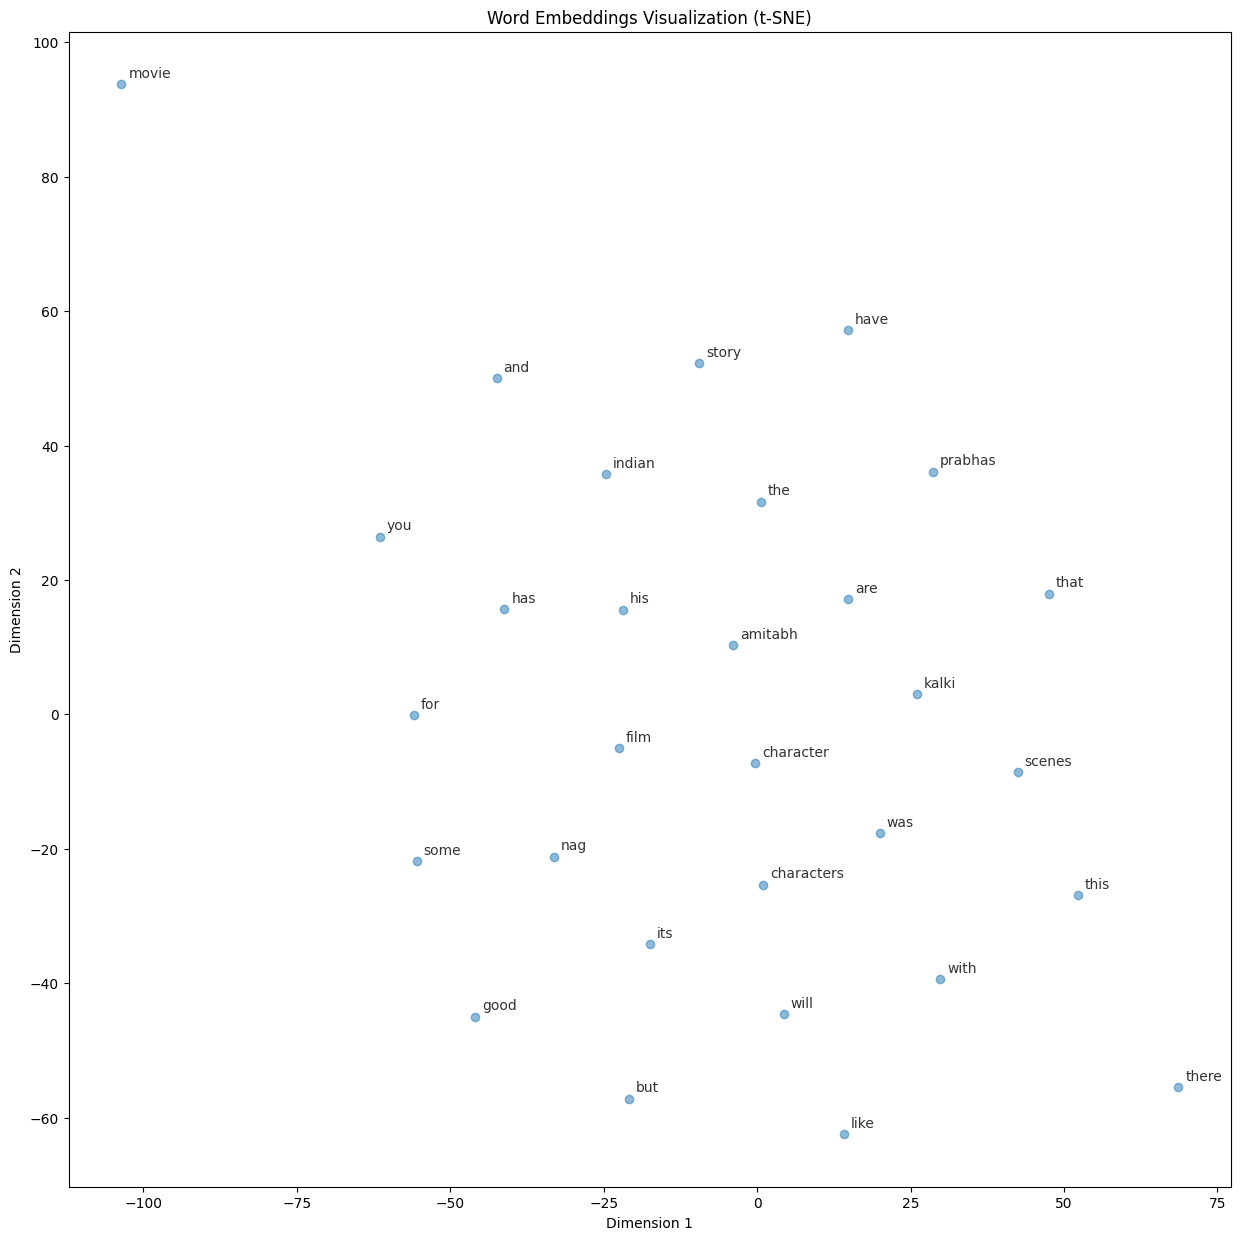

In [16]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re
import string
import csv

class GloVeModel:
    def __init__(self, embedding_dim=100, context_size=5, learning_rate=0.05, epochs=50):
        self.embedding_dim = embedding_dim
        self.context_size = context_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.word_to_id = {}
        self.id_to_word = {}
        self.cooccurrence_matrix = None
        self.W = None
        self.W_context = None
        self.b = None
        self.b_context = None

    def preprocess_text(self, text): #preprocessing
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\d+', '', text)
        text = ' '.join(text.split())
        return text

    def build_vocab(self, texts): # building vocabulary
        vocab = set()
        for text in texts:
            clean_text = self.preprocess_text(text)
            words = clean_text.split()
            words = [w for w in words if len(w) > 2]
            vocab.update(words)

        for i, word in enumerate(sorted(vocab)):
            self.word_to_id[word] = i
            self.id_to_word[i] = word

        return len(vocab)

    def build_cooccurrence_matrix(self, texts): #building word occurences
        vocab_size = len(self.word_to_id)
        cooccurrence = np.zeros((vocab_size, vocab_size))

        for text in texts:
            clean_text = self.preprocess_text(text)
            words = clean_text.split()
            words = [w for w in words if len(w) > 2]
            word_ids = [self.word_to_id[word] for word in words if word in self.word_to_id]

            for i, center_word_id in enumerate(word_ids):
                start = max(0, i - self.context_size)
                end = min(len(word_ids), i + self.context_size + 1)

                for j in range(start, end):
                    if i != j:
                        context_word_id = word_ids[j]
                        cooccurrence[center_word_id][context_word_id] += 1.0

        self.cooccurrence_matrix = cooccurrence

    def initialize_parameters(self):
        vocab_size = len(self.word_to_id)
        self.W = np.random.randn(vocab_size, self.embedding_dim) * 0.01
        self.W_context = np.random.randn(vocab_size, self.embedding_dim) * 0.01
        self.b = np.zeros(vocab_size)
        self.b_context = np.zeros(vocab_size)

    def train(self): #GloVe model
        vocab_size = len(self.word_to_id)

        for epoch in range(self.epochs):
            total_loss = 0

            for i in range(vocab_size):
                for j in range(vocab_size):
                    if self.cooccurrence_matrix[i][j] > 0:
                        cooc = self.cooccurrence_matrix[i][j]
                        weight = (cooc / 100) ** 0.75 if cooc < 100 else 1

                        inner_product = np.dot(self.W[i], self.W_context[j])
                        prediction = inner_product + self.b[i] + self.b_context[j]
                        loss = weight * (prediction - np.log(cooc + 1)) ** 2
                        total_loss += loss

                        grad_prediction = 2 * weight * (prediction - np.log(cooc + 1))
                        grad_W_i = grad_prediction * self.W_context[j]
                        grad_W_context_j = grad_prediction * self.W[i]
                        grad_b_i = grad_prediction
                        grad_b_context_j = grad_prediction

                        self.W[i] -= self.learning_rate * grad_W_i
                        self.W_context[j] -= self.learning_rate * grad_W_context_j
                        self.b[i] -= self.learning_rate * grad_b_i
                        self.b_context[j] -= self.learning_rate * grad_b_context_j

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {total_loss:.4f}")

    def get_vector(self, word):
        if word in self.word_to_id:
            word_id = self.word_to_id[word]
            return (self.W[word_id] + self.W_context[word_id]) / 2
        return None

    def visualize_embeddings(self, num_words=50):
        if self.cooccurrence_matrix is None:
            print("Co-occurrence matrix not initialized")
            return

        word_frequencies = np.sum(self.cooccurrence_matrix, axis=1)
        top_words_idx = np.argsort(word_frequencies)[-num_words:]

        valid_embeddings = []
        valid_words = []

        for idx in top_words_idx:
            word = self.id_to_word[idx]
            vector = self.get_vector(word)
            if vector is not None:
                valid_embeddings.append(vector)
                valid_words.append(word)

        embeddings = np.array(valid_embeddings)

        tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings)-1))
        embeddings_2d = tsne.fit_transform(embeddings)

        plt.figure(figsize=(15, 15))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)

        for i, word in enumerate(valid_words):
            plt.annotate(word,
                        xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=10,
                        alpha=0.8)

        plt.title('Word Embeddings Visualization (t-SNE)')
        plt.xlabel('Dimension 1')
        plt.ylabel('Dimension 2')
        plt.show()
        plt.close()

reviews = []
with open('review.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        reviews.append(row['Comments'])

model = GloVeModel(embedding_dim=50, context_size=3, learning_rate=0.05, epochs=30)
model.build_vocab(reviews)
model.build_cooccurrence_matrix(reviews)
model.initialize_parameters()
model.train()

# Visualize the embeddings
model.visualize_embeddings(num_words=30)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [22]:
# The GitHub link of your final csv file


https://github.com/MMR1318/Maheshreddy_INFO5731_Fall2024/blob/main/film_reviews.csv
# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [21]:
# Type your answer
i found the assignment challenging and challenges i faced are developing the model from scratch using GloVeModel
and i enjoyed working with TF-IDF and time provided is enough.